In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# df_hive = pd.read_csv("DelayedFlights-updated.csv", sheet_name="Hive")

df_hive = pd.read_excel("DelayedFlights-updated_Results.xlsx", sheet_name="Hive")
df_spark = pd.read_excel("DelayedFlights-updated_Results.xlsx", sheet_name="Spark")


In [26]:
df_hive.head()

,Query,Run1,Run2,Run3,Run4,Run5
0,1,7.352,2.045,2.208,2.151,1.731
1,2,7.682,1.967,7.248,7.034,1.609
2,3,1.455,1.374,1.552,1.872,1.482
3,4,7.146,1.512,1.997,1.854,1.947
4,5,7.281,1.507,1.733,1.618,1.613


In [25]:
df_spark.head()

,Query_Number,Time_Iteration_1,Time_Iteration_2,Time_Iteration_3,Time_Iteration_4,Time_Iteration_5
0,1,0.140286,0.027010,0.026033,0.026438,0.024373
1,2,0.029828,0.035188,0.024552,0.026117,0.027917
2,3,0.022470,0.022420,0.023030,0.021814,0.021263
3,4,0.022546,0.018603,0.021651,0.023013,0.021145
4,5,0.016958,0.019598,0.019614,0.017769,0.018332


In [28]:
# Extracting Hadoop times for each run
spark_runtime = [df_spark[f'Time_Iteration_{i}'][0] for i in range(1, 6)]
hive_runtime = [df_hive[f'Run{i}'][0] for i in range(1, 6)]


In [29]:
iterations = [1, 2, 3, 4, 5]  # Number of iterations

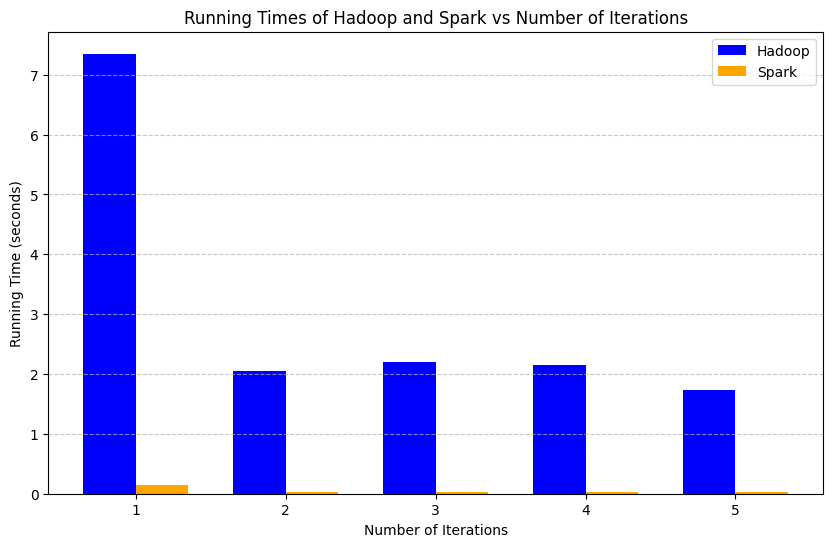

In [30]:
# Calculate the width of each bar
bar_width = 0.35


# Set the positions of the bars
hadoop_positions = [i for i in iterations]
spark_positions = [i + bar_width for i in iterations]

# Plotting the data
plt.figure(figsize=(10, 6))

plt.bar(hadoop_positions, hive_runtime, width=bar_width, color='blue', label='Hadoop')
plt.bar(spark_positions, spark_runtime, width=bar_width, color='orange', label='Spark')

plt.xlabel('Number of Iterations')
plt.ylabel('Running Time (seconds)')
plt.title('Running Times of Hadoop and Spark vs Number of Iterations')
plt.legend()

# Set x-axis ticks to match the number of iterations
plt.xticks([i + bar_width/2 for i in iterations], iterations)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [40]:
# Calculate average runtime for each query
df_hive['Average'] = df_hive[['Run1', 'Run2', 'Run3', 'Run4', 'Run5']].mean(axis=1)
df_spark['Average'] = df_spark[['Time_Iteration_1', 'Time_Iteration_2', 'Time_Iteration_3', 'Time_Iteration_5', 'Time_Iteration_5']].mean(axis=1)

Queries = [
            "Carrier delay query",
            "NAS delay query",
            "Weather delay query",
            "Late Aircraft Delay query",
            "Security Delay query"
        ]

# Prepare the table for plotting
table_data = {
    'Time taken by query (in sec)': ['Query ' + str(query) for query in Queries],
    'HiveQL': df_hive['Average'],
    'SparkSQL': df_spark['Average']
}

# Create a new DataFrame for the table
table_df = pd.DataFrame(table_data)

# Plot the table
print(table_df)


# Export the DataFrame to a CSV file
csv_filename = 'Query Runtime wise HiveQL vs SparkSQL.csv'
table_df.to_csv(csv_filename, index=False)  # index=False to exclude row numbers
print(f"DataFrame exported to {csv_filename}")

      Time taken by query (in sec)  HiveQL  SparkSQL
0        Query Carrier delay query  3.0974  0.048415
1            Query NAS delay query  5.1080  0.029080
2        Query Weather delay query  1.5470  0.022089
3  Query Late Aircraft Delay query  2.8912  0.021018
4       Query Security Delay query  2.7504  0.018567
DataFrame exported to Query Runtime wise HiveQL vs SparkSQL.csv


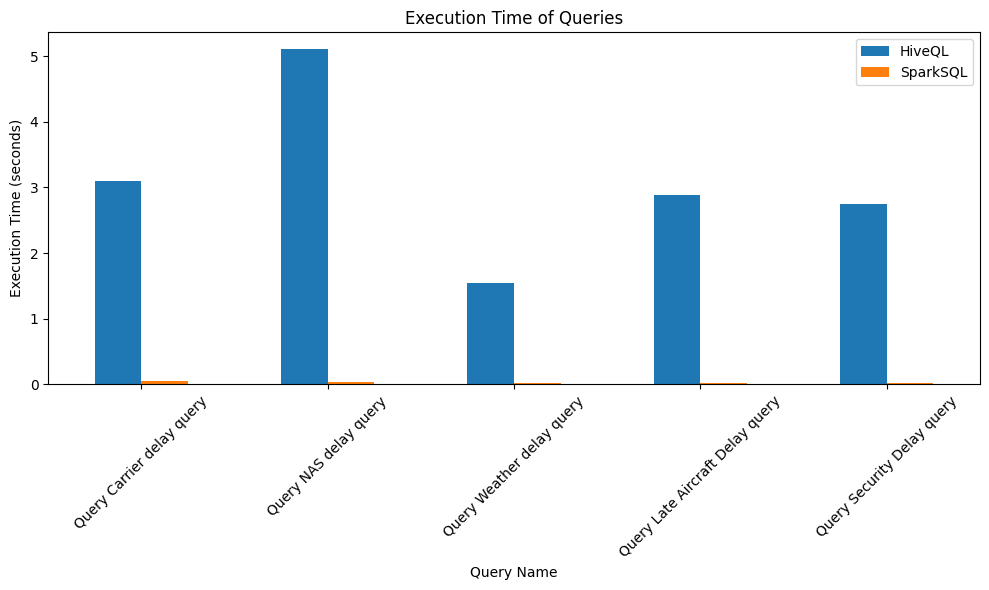

In [42]:
# Create a pandas DataFrame
# df = pd.DataFrame(data)

# Set the index to 'Query_name' for easy plotting
table_df.set_index('Time taken by query (in sec)', inplace=True)

# Plot the bar graph
ax = table_df.plot(kind='bar', figsize=(10, 6), rot=45)

# Set the title and labels
plt.title('Execution Time of Queries')
plt.xlabel('Query Name')
plt.ylabel('Execution Time (seconds)')

# Show the plot
plt.tight_layout()
plt.show()